 # Verificador de Apostas da Mega Sena
 
 ### Este programa verifica jogos da mega sena que estão armazenados numa base de dados, confere com o resultado do concurso sorteado, exibe em tela cria as informações e cria um documento PDF com o  registrado.
 
 ### Como funciona: Insira os números dos último sorteio que deseja conferir. Os números devem ser digitados e separados apenas por espaço. O programa vai percorrer a lista contida na base de dados em CSV, salvar o resultado em um PDF e exibir em tela resultado com uma visualização amigável a interface humana., em forma de tabela onde é informado, a aposta,  os números  acertados, a quantidade de acertos, se a aposta foi premiada e a data e hora do armazenamento dessas informações (carga).
 
 ### Bibliotecas utilizadas: Pandas, Datetime e Matplotlib 
 
 
 #### Desenvolvido por Leonardo Gama em 01/01/2024


##############################################################################################
############################ VERIFICADOR DE APOSTAS NA MEGA SENA #############################
##############################################################################################

- Insira os números do último sorteio (separados por espaço): 21 24 33 41 48 56
- Resultado salvo em: Mega_sena_2024-01-01_11-20-35.pdf
----------------------------------------------------------------------------------------------


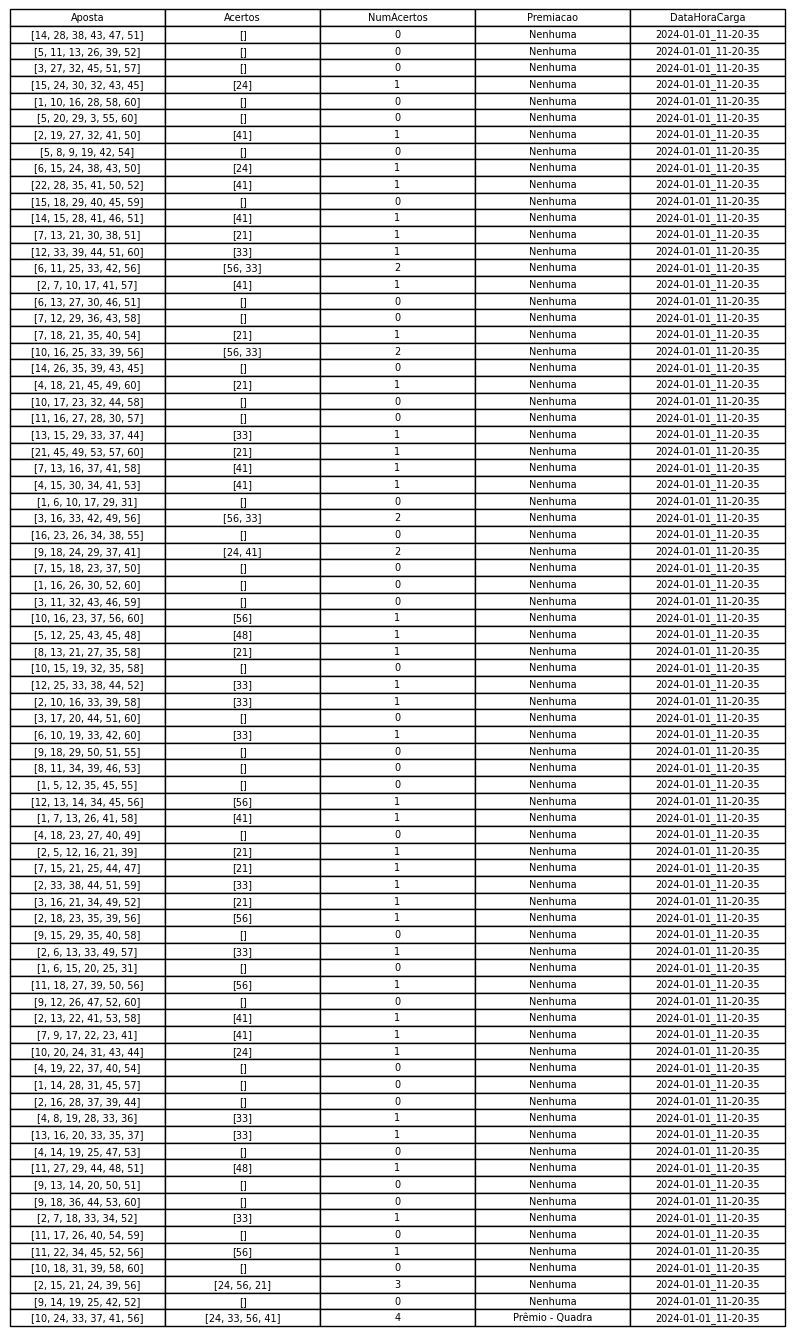

In [18]:
import pandas as pd
from datetime import datetime
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt



print("""
##############################################################################################
############################ VERIFICADOR DE APOSTAS NA MEGA SENA #############################
##############################################################################################
""")

# Função para ler um arquivo CSV e retornar um DataFrame do Pandas
def ler_csv(nome_arquivo):
    return pd.read_csv(nome_arquivo)

# Função para conferir as apostas em relação ao resultado do sorteio
def conferir_apostas(df, resultado_sorteio):
    # Cria um DataFrame vazio para armazenar os resultados das apostas
    df_resultados = pd.DataFrame(columns=["Aposta", "Acertos", "NumAcertos", "Premiacao", "DataHoraCarga"])

    # Obtém a data e hora atual
    data_hora_carga = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

    # Itera sobre cada linha do DataFrame de apostas
    for index, row in df.iterrows():
        # Converte a linha em uma lista (aposta)
        aposta = row.tolist()
        
        # Calcula os números acertados comparando com o resultado do sorteio
        acertos = set(aposta) & set(resultado_sorteio)
        num_acertos = len(acertos)

        # Verifica a condição de premiação
        if num_acertos == 4:
            premiacao = "Prêmio - Quadra"
        elif num_acertos == 5:
            premiacao = "Prêmio - Quina"
        elif num_acertos == 6:
            premiacao = "Prêmio - Sena"
        else:
            premiacao = "Nenhuma"

        # Adiciona os resultados da aposta ao DataFrame de resultados
        df_resultados = df_resultados.append({
            'Aposta': aposta,
            'Acertos': list(acertos),
            'NumAcertos': num_acertos,
            'Premiacao': premiacao,
            'DataHoraCarga': data_hora_carga
        }, ignore_index=True)

    # Adiciona um índice à esquerda começando por 001
    df_resultados.reset_index(drop=True, inplace=True)
    df_resultados.index += 1

    # Retorna o DataFrame de resultados
    return df_resultados

# Substitua pelo caminho do seu arquivo CSV
arquivo_csv = "Base_de_apostas.csv"

# Solicita ao usuário os números do último sorteio
resultado_sorteio = [int(num) for num in input("- Insira os números do último sorteio (separados por espaço): ").split()]

# Lê o arquivo CSV de apostas e cria um DataFrame
df_apostas = ler_csv(arquivo_csv)

# Confere as apostas em relação ao resultado do sorteio
df_resultados = conferir_apostas(df_apostas, resultado_sorteio)

# Adiciona a tabela interativa usando IPython.display.HTML
html_table = df_resultados.to_html(index=True, escape=False)

# Cria um gráfico vazio (será usado apenas para gerar uma tabela)
fig, ax = plt.subplots(figsize=(10, 2))
ax.axis('off')  # Desliga os eixos para parecer uma tabela

# Adiciona a tabela ao gráfico
table = ax.table(cellText=df_resultados.values,
                 colLabels=df_resultados.columns,
                 cellLoc = 'center', loc='center')

# Gera o nome do arquivo PDF com a data e hora da carga
pdf_path = f"Mega_sena_{df_resultados['DataHoraCarga'].iloc[0]}.pdf"

# Salva a tabela como PDF
pdf_pages = PdfPages(pdf_path)
pdf_pages.savefig(fig, bbox_inches='tight', pad_inches=0)
pdf_pages.close()

# Exibe o link para download do arquivo PDF
print(f"- Resultado salvo em: {pdf_path}")
print("----------------------------------------------------------------------------------------------")